# **Regularization**

Implement L2, L1, early stopping and drop out regularization for the previous assignment and write a report comparing the results (Accuracy, Precision, Recall and F1)

Dataset:  use “Pima Indians Diabetes Dataset” for this task. The dataset can be downloaded from the kaggle website which can be found

(https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from keras import regularizers



In [2]:

DF = pd.read_csv("/content/diabetes.csv")
DF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

df_label = DF['Outcome']
df_features = DF.drop('Outcome', 1)
df_features.replace('?', -99999, inplace=True)
print(df_label.head())
df_features.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## **Heat Map Correlation** 

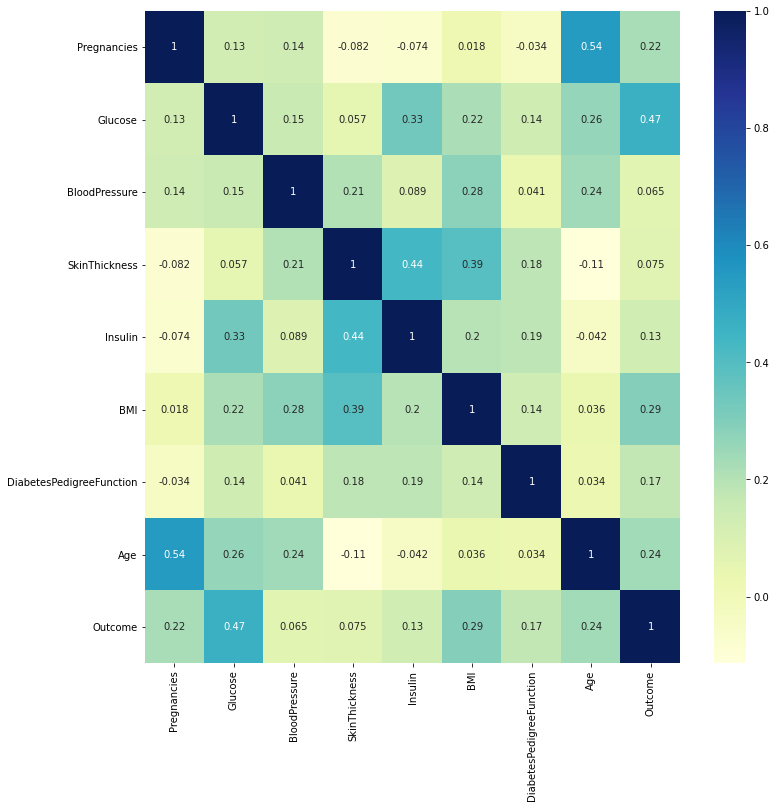

In [4]:
plt.figure(figsize=(12,12))
sns.heatmap(DF.corr(), cmap="YlGnBu", annot= True,)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


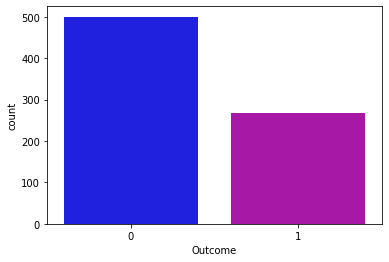

In [5]:
# Count plot for target veriable
sns.countplot(DF['Outcome'], palette=['b', 'm'])

**Pie Chart**

Text(0.5, 1.0, 'Percentage Breakdown of Non-Diabetic and Diabetic Individuals')

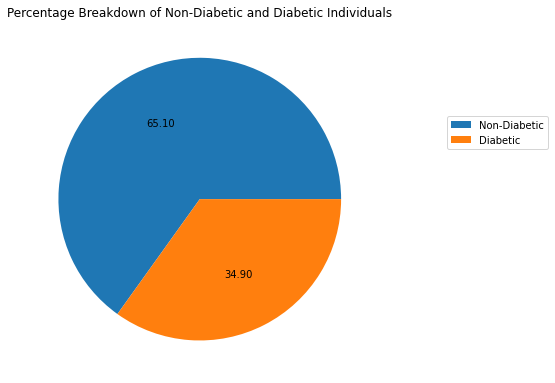

In [6]:

plt.figure(figsize=(6.5,6.5))
plt.pie(DF['Outcome'].value_counts(),autopct='%.2f')
plt.legend(['Non-Diabetic','Diabetic'],loc='best', bbox_to_anchor=(1, 0, .5, .75))
plt.title("Percentage Breakdown of Non-Diabetic and Diabetic Individuals")

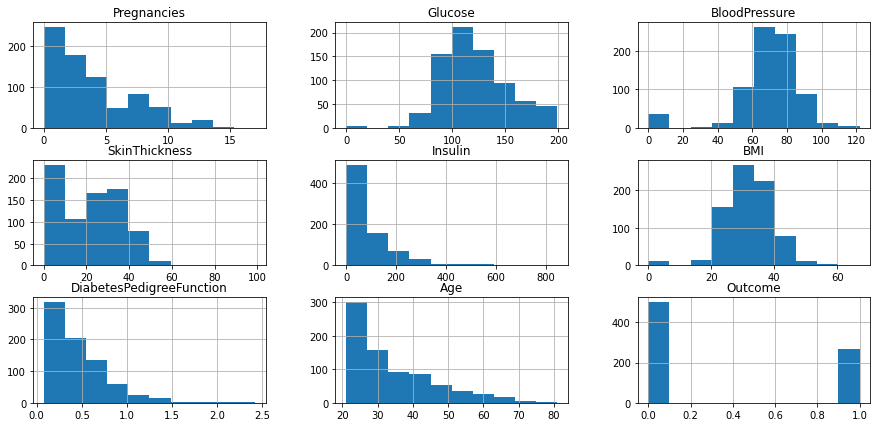

In [7]:
DF.hist(figsize = (15,7));

In [8]:

def plot(s):
    sns.kdeplot(DF.loc[ DF.Outcome == 0, s] )
    sns.kdeplot(DF.loc[ DF.Outcome == 1, s] )    
    plt.legend(['Healthy','Diabetic'])
    plt.ylabel('Number of Patients')
    plt.yticks([])
    plt.show() 

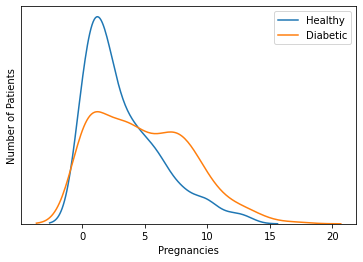

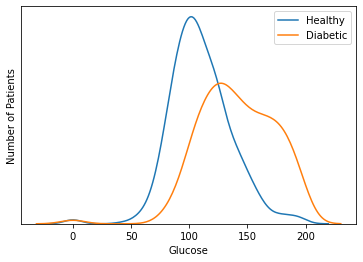

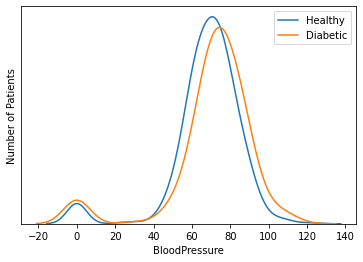

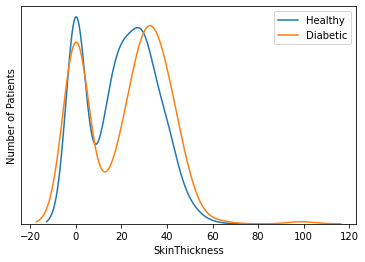

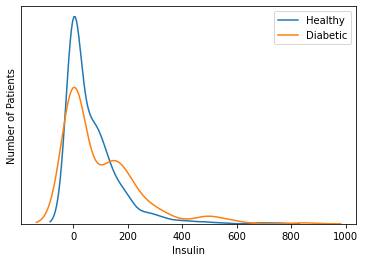

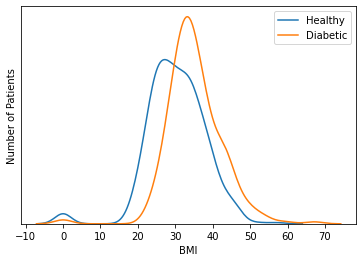

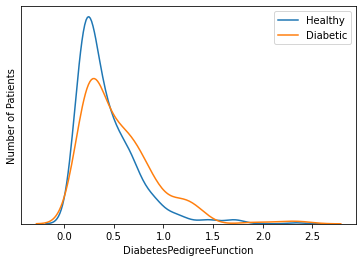

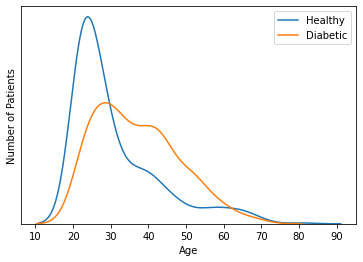

In [9]:

for i in DF.columns[:-1]:
    plot(i)

In [10]:
label = []
for lab in df_label:
    if lab == 1:
        label.append([1, 0])  # class 1
    elif lab == 0:
        label.append([0, 1])  # class 0

In [11]:
Data = np.array(df_features)
label = np.array(label)
print(Data.shape,label.shape)

(768, 8) (768, 2)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(Data, label, test_size=0.2, random_state=60)
x_train.shape

(614, 8)

# **creating a NN model for l2**

In [13]:
model = Sequential()
#Hidden Layer 1
model.add(Dense(500,input_dim=8, activation='sigmoid', kernel_regularizer=regularizers.l2(1e-4), bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-4)))
#Hidden Layer 2 
model.add(Dense(100, activation='sigmoid',kernel_regularizer=regularizers.l2(1e-4),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-4)))
#Output Layer
model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=1000, batch_size=70, validation_data=(x_test, y_test))

Epoch 1/1000
9/9 [==============================] - 1s 69ms/step - loss: 0.3481 - accuracy: 0.5025 - val_loss: 0.2650 - val_accuracy: 0.6688
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.2665 - accuracy: 0.6488 - val_loss: 0.2469 - val_accuracy: 0.6558
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.2587 - accuracy: 0.6171 - val_loss: 0.2444 - val_accuracy: 0.6688
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2452 - accuracy: 0.6629 - val_loss: 0.2391 - val_accuracy: 0.6494
Epoch 5/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2325 - accuracy: 0.6955 - val_loss: 0.2317 - val_accuracy: 0.7078
Epoch 6/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2336 - accuracy: 0.6969 - val_loss: 0.2288 - val_accuracy: 0.6948
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.2196 - accuracy: 0.7403 - val_loss: 0.2224 - val_accuracy: 0.7078
Epoch 8/1000
9/9

In [14]:
feature_try1 = np.array([x_train[0]])
feature_try2 = np.array([x_train[1]])



Result =model.predict_classes(feature_try2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [15]:
if Result==0:
    print("NO Diabetes")
else:
    print("Diabetes")

NO Diabetes


# **Accuracy**

In [16]:
# Testing accuracy
_, accuracy = model.evaluate(x_test, y_test)
print('Testing Accuracy: %.2f' % (accuracy*100))


#Training Accuracy
_, accuracy = model.evaluate(x_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))



5/5 [==============================] - 0s 3ms/step - loss: 0.2753 - accuracy: 0.6883
Testing Accuracy: 68.83
20/20 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9446
Training Accuracy: 94.46


In [17]:
# Make probability predictions with the model
y_pred = model.predict(x_test)

M=np.argmax(y_pred, axis=1)
NT=np.argmax(y_test, axis=1)

# **Accuracy, Precision,f1 score and recall: l2**

In [18]:
Accuracy = accuracy_score(NT,M)
print('accuracy: ',(Accuracy*100))

Precision = precision_score(NT, M)
print('Precision: ', Precision)

Score = f1_score(NT,M)
print('f1-score: ',Score)

recall = recall_score(NT, M)
print("recall: ", recall)

CM=confusion_matrix(NT,M)
print('confusion matrix: \n', CM)

accuracy:  68.83116883116884
Precision:  0.8089887640449438
f1-score:  0.75
recall:  0.6990291262135923
confusion matrix: 
 [[34 17]
 [31 72]]


# **creating a NN model for l1**

In [19]:
model = Sequential()
#Hidden Layer 1
model.add(Dense(500,input_dim=8, activation='sigmoid', kernel_regularizer=regularizers.l1(1e-4), bias_regularizer=regularizers.l1(1e-4),activity_regularizer=regularizers.l1(1e-4)))
#Hidden Layer 2 
model.add(Dense(100, activation='sigmoid',kernel_regularizer=regularizers.l1(1e-4),bias_regularizer=regularizers.l1(1e-4),activity_regularizer=regularizers.l1(1e-4)))
#Output Layer
model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=1000, batch_size=70, validation_data=(x_test, y_test))

Epoch 1/1000
9/9 [==============================] - 1s 32ms/step - loss: 0.5274 - accuracy: 0.6528 - val_loss: 0.4904 - val_accuracy: 0.6688
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.4841 - accuracy: 0.6746 - val_loss: 0.4782 - val_accuracy: 0.6558
Epoch 3/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.4824 - accuracy: 0.6356 - val_loss: 0.4628 - val_accuracy: 0.6169
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.4563 - accuracy: 0.6660 - val_loss: 0.4327 - val_accuracy: 0.6883
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.4241 - accuracy: 0.7207 - val_loss: 0.4171 - val_accuracy: 0.6558
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.4144 - accuracy: 0.7013 - val_loss: 0.4115 - val_accuracy: 0.6494
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.4010 - accuracy: 0.6916 - val_loss: 0.3861 - val_accuracy: 0.6883
Epoch 8/1000
9/9 

In [20]:
feature_try1 = np.array([x_train[0]])
feature_try2 = np.array([x_train[1]])

In [21]:
if Result==0:
    print("NO Diabetes")
else:
    print("Diabetes")

NO Diabetes


# **Accuracy**

In [22]:
# Testing accuracy
_, accuracy = model.evaluate(x_test, y_test)
print('Testing Accuracy: %.2f' % (accuracy*100))


#Training Accuracy
_, accuracy = model.evaluate(x_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.7597
Testing Accuracy: 75.97
20/20 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.9300
Training Accuracy: 93.00


# **Accuracy, Precision,f1 score and recall: l1**

In [23]:
# Make probability predictions with the model
y_pred = model.predict(x_test)

M=np.argmax(y_pred, axis=1)
NT=np.argmax(y_test, axis=1)

In [24]:
Accuracy = accuracy_score(NT,M)
print('accuracy: ',(Accuracy*100))

Precision = precision_score(NT, M)
print('Precision: ', Precision)

Score = f1_score(NT,M)
print('f1-score: ',Score)

recall = recall_score(NT, M)
print("recall: ", recall)

CM=confusion_matrix(NT,M)
print('confusion matrix: \n', CM)

accuracy:  75.97402597402598
Precision:  0.8173076923076923
f1-score:  0.821256038647343
recall:  0.8252427184466019
confusion matrix: 
 [[32 19]
 [18 85]]


In [25]:

from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm

In [26]:
pip install h5py


# **creating a NN model for Early stopping regularization**

In [27]:
model = Sequential()
#Hidden Layer 1
model.add(Dense(500,input_dim=8, activation='sigmoid'))
#Hidden Layer 2
model.add(Dense(100, activation='sigmoid'))
#Output Layer 
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ES = EarlyStopping(monitor='val_loss',mode='min',verbose=0,patience=450)
MC = ModelCheckpoint('best_model.h5',monitor='val_accuracy',mode='max',verbose=0,save_best_only=True)

model.fit(x_train,y_train, epochs=1000, batch_size=70, validation_data=(x_test,y_test),callbacks=[ES,MC])

Epoch 1/1000
9/9 [==============================] - 1s 27ms/step - loss: 0.7499 - accuracy: 0.4948 - val_loss: 0.6404 - val_accuracy: 0.6688
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.6189 - accuracy: 0.6738 - val_loss: 0.6218 - val_accuracy: 0.6753
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.6380 - accuracy: 0.6651 - val_loss: 0.6003 - val_accuracy: 0.6688
Epoch 4/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.6137 - accuracy: 0.6543 - val_loss: 0.5914 - val_accuracy: 0.6688
Epoch 5/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.5984 - accuracy: 0.6702 - val_loss: 0.5839 - val_accuracy: 0.6883
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.5786 - accuracy: 0.7060 - val_loss: 0.5785 - val_accuracy: 0.6753
Epoch 7/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.5904 - accuracy: 0.6950 - val_loss: 0.5694 - val_accuracy: 0.6753
Epoch 8/1000
9/9 [

In [28]:
feature_try1 = np.array([x_train[0]])
feature_try2 = np.array([x_train[1]])

In [29]:
if Result==0:
    print("NO Diabetes")
else:
    print("Diabetes")

NO Diabetes


# **Accuracy**

In [30]:
# Testing accuracy
_, accuracy = model.evaluate(x_test, y_test)
print('Testing Accuracy: %.2f' % (accuracy*100))


#Training Accuracy
_, accuracy = model.evaluate(x_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.9997 - accuracy: 0.7143
Testing Accuracy: 71.43
20/20 [==============================] - 0s 1ms/step - loss: 0.1773 - accuracy: 0.9300
Training Accuracy: 93.00


In [31]:
# Make probability predictions with the model
y_pred = model.predict(x_test)

M=np.argmax(y_pred, axis=1)
NT=np.argmax(y_test, axis=1)

# **Accuracy, Precision,f1 score and recall : Early stopping**

In [32]:
Accuracy = accuracy_score(NT,M)
print('accuracy: ',(Accuracy*100))

Precision = precision_score(NT, M)
print('Precision: ', Precision)

Score = f1_score(NT,M)
print('f1-score: ',Score)

recall = recall_score(NT, M)
print("recall: ", recall)

CM=confusion_matrix(NT,M)
print('confusion matrix: \n', CM)

accuracy:  71.42857142857143
Precision:  0.7864077669902912
f1-score:  0.7864077669902912
recall:  0.7864077669902912
confusion matrix: 
 [[29 22]
 [22 81]]


# **creating a NN model for Dropout regularization**

In [34]:
from keras.layers import Dropout

In [35]:
model = Sequential()
#Hidden Layer 1
model.add(Dense(500,input_dim=8, activation='sigmoid',kernel_constraint=maxnorm(5)))
model.add(Dropout(0.5))
#Hidden Layer 1
model.add(Dense(100, activation='sigmoid',kernel_constraint=maxnorm(5)))
model.add(Dropout(0.5))
# Output Layer 
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer ='adam',metrics=['accuracy'])

model.fit(x_train,y_train, epochs=1000, batch_size=70, validation_data=(x_test,y_test))


Epoch 1/1000
9/9 [==============================] - 1s 31ms/step - loss: 0.7870 - accuracy: 0.5591 - val_loss: 0.6427 - val_accuracy: 0.6688
Epoch 2/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.6981 - accuracy: 0.6149 - val_loss: 0.6137 - val_accuracy: 0.6688
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.6733 - accuracy: 0.6442 - val_loss: 0.6031 - val_accuracy: 0.6688
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.6254 - accuracy: 0.6432 - val_loss: 0.5974 - val_accuracy: 0.6688
Epoch 5/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.6364 - accuracy: 0.6528 - val_loss: 0.5986 - val_accuracy: 0.6688
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.6411 - accuracy: 0.6307 - val_loss: 0.5892 - val_accuracy: 0.6688
Epoch 7/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.6467 - accuracy: 0.6359 - val_loss: 0.5859 - val_accuracy: 0.6688
Epoch 8/1000
9/

In [36]:
feature_try1 = np.array([x_train[0]])
feature_try2 = np.array([x_train[1]])

In [37]:
if Result==0:
    print("NO Diabetes")
else:
    print("Diabetes")

NO Diabetes


# **Accuracy**

In [38]:
# Testing accuracy
_, accuracy = model.evaluate(x_test, y_test)
print('Testing Accuracy: %.2f' % (accuracy*100))


#Training Accuracy
_, accuracy = model.evaluate(x_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.5503 - accuracy: 0.8052
Testing Accuracy: 80.52
20/20 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.8632
Training Accuracy: 86.32


In [39]:
# Make probability predictions with the model
y_pred = model.predict(x_test)

M=np.argmax(y_pred, axis=1)
NT=np.argmax(y_test, axis=1)

# **Accuracy, Precision,f1 score and recall : Dropout**

In [40]:
Accuracy = accuracy_score(NT,M)
print('accuracy: ',(Accuracy*100))

Precision = precision_score(NT, M)
print('Precision: ', Precision)

Score = f1_score(NT,M)
print('f1-score: ',Score)

recall = recall_score(NT, M)
print("recall: ", recall)

CM=confusion_matrix(NT,M)
print('confusion matrix: \n', CM)

accuracy:  80.51948051948052
Precision:  0.8411214953271028
f1-score:  0.8571428571428571
recall:  0.8737864077669902
confusion matrix: 
 [[34 17]
 [13 90]]


# **Conparison: L2, L1, early stopping and drop out regularization**

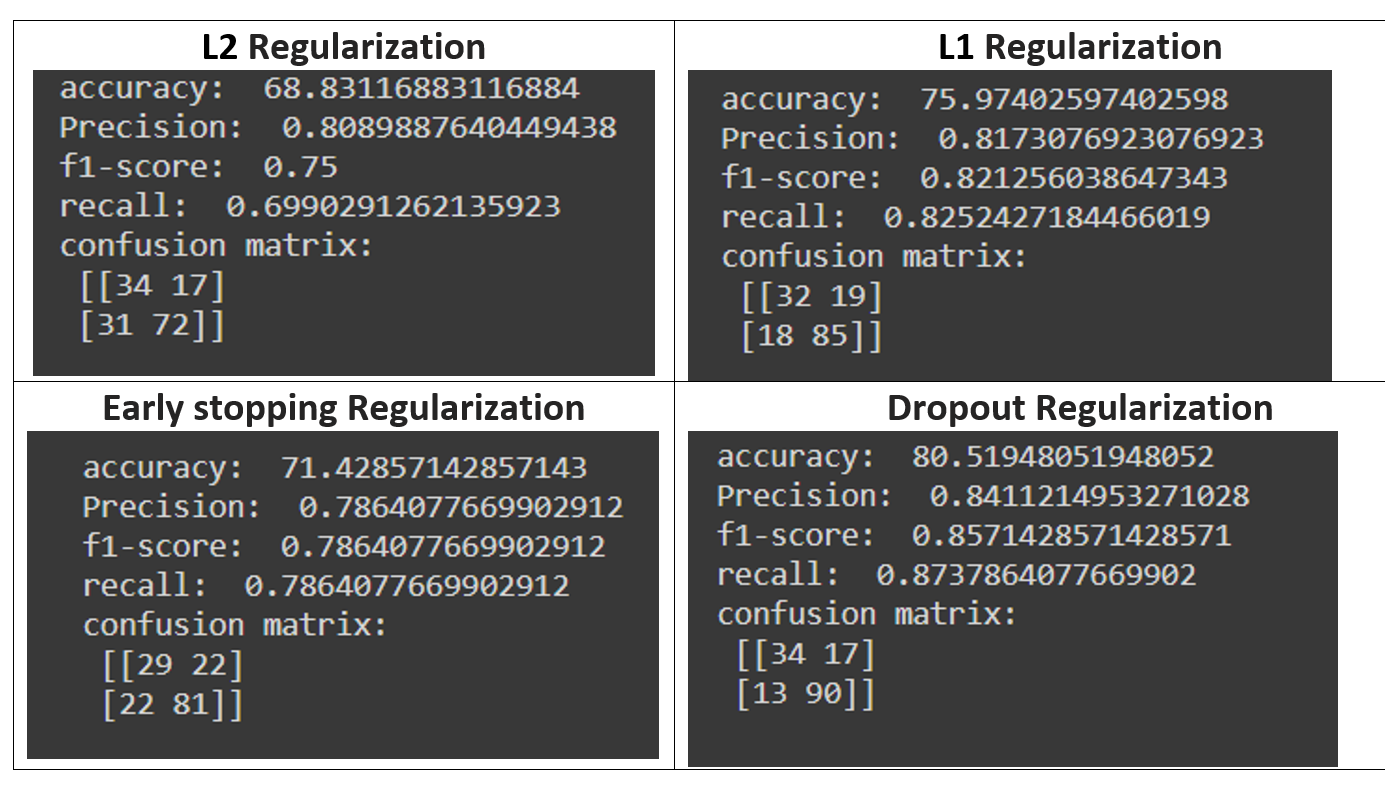

From the above table(Results of  L2, L1, early stopping and dropout regularization) we can see that dropout regulazation has better accuracy,precision,f1-score, and recall as compared to other regularization so, if we will use dropout regularization chances of overfitting will be less in it as compared to others.
Hence Dropout regularization is a better model among the above four models.